In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

In [2]:
raw = pd.read_csv('../../../../datasets/paris_listings.csv')
df = raw.copy()


# 슈퍼호스트 결측치 제거(5%미만)
- 84397  =>  84306
# 리뷰수 = 0 제거
- (리뷰수 =  0 > 리뷰 점수 x > 얻을 수 있는게 없음)
- 84306  =>  58744 


In [3]:
df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
})

df['url'] = raw['listing_url']

df['숙소_가격']


0        $250.00
1        $140.00
2        $107.00
3        $200.00
4            NaN
          ...   
84392     $80.00
84393    $167.00
84394     $98.00
84395    $296.00
84396     $71.00
Name: 숙소_가격, Length: 84397, dtype: object

In [4]:
print(len(df))
df = df[~df['슈퍼호스트'].isnull()]
print(len(df))

84397
84306


In [5]:
df = df[df['리뷰수']!=0]
print(len(df))

58744


#  숙소가격 null값인 경우
- 숙소가격 null 개수 : 16993
- 욕실수 :  16951    90퍼 이상
- 침실수 :  4963     25퍼 정도
- 침대수 :  16951    90퍼 이상

+ => 숙소 가격 결측치 정하면 => 얘네도 해야함 => 크롤링?

나머지는 5%미만

In [6]:
print(f"숙소가격 null 개수 : {df['숙소_가격'].isnull().sum()}")

숙소가격 null 개수 : 16993


In [7]:
df[df['숙소_가격'].isnull()].isnull().sum()

숙소_id              0
호스트_id             0
슈퍼호스트              0
숙소_수               0
숙소_지역              0
숙소_유형              0
수용인원수              0
욕실수            16951
침실수             4963
침대수            16951
편의시설               0
숙소_가격          16993
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수               0
숙소_정확성_리뷰점수        9
숙소_청결도_리뷰점수        7
숙소_체크인_리뷰점수       16
숙소_소통_리뷰점수         8
숙소_위치_리뷰점수        14
숙소_가격_리뷰점수        15
평균_리뷰수             0
url                0
dtype: int64

# 숙소가격 값 있는 경우
-  41751개
- 전부 5%미만 제거 가능
+ 숙소 가격 할인전 금액으로 해야함
+ 30일 이상 한 것들은 월 단위로 함 

In [8]:
len(df[~df['숙소_가격'].isnull()])

41751

In [9]:
df[~df['숙소_가격'].isnull()].isnull().sum()

숙소_id           0
호스트_id          0
슈퍼호스트           0
숙소_수            0
숙소_지역           0
숙소_유형           0
수용인원수           0
욕실수            10
침실수            45
침대수            83
편의시설            0
숙소_가격           0
최소_숙박일          0
최대_숙박일          0
리뷰수             0
30일_리뷰수         0
리뷰점수            0
숙소_정확성_리뷰점수    25
숙소_청결도_리뷰점수    23
숙소_체크인_리뷰점수    27
숙소_소통_리뷰점수     24
숙소_위치_리뷰점수     26
숙소_가격_리뷰점수     30
평균_리뷰수          0
url             0
dtype: int64

# 숙소_지역 별 가격

In [10]:
df['숙소_지역'].unique()

array(['Observatoire', 'Temple', 'Hôtel-de-Ville', 'Entrepôt', 'Bourse',
       'Popincourt', 'Louvre', 'Buttes-Montmartre', 'Buttes-Chaumont',
       'Opéra', 'Batignolles-Monceau', 'Passy', 'Élysée', 'Vaugirard',
       'Ménilmontant', 'Panthéon', 'Gobelins', 'Reuilly', 'Luxembourg',
       'Palais-Bourbon'], dtype=object)

# 달러 확인하기 귀찮음(계속 환율 계산)
- 4/8일 당시 환율 1352.60 곱함

C:\Users\ciw96\AppData\Local\Temp\ipykernel_30616\72679870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check1['숙소_가격'] = check1['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\ciw96\AppData\Local\Temp\ipykernel_30616\72679870.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check1['숙소_가격'] = check1['숙소_가격']*1352.60


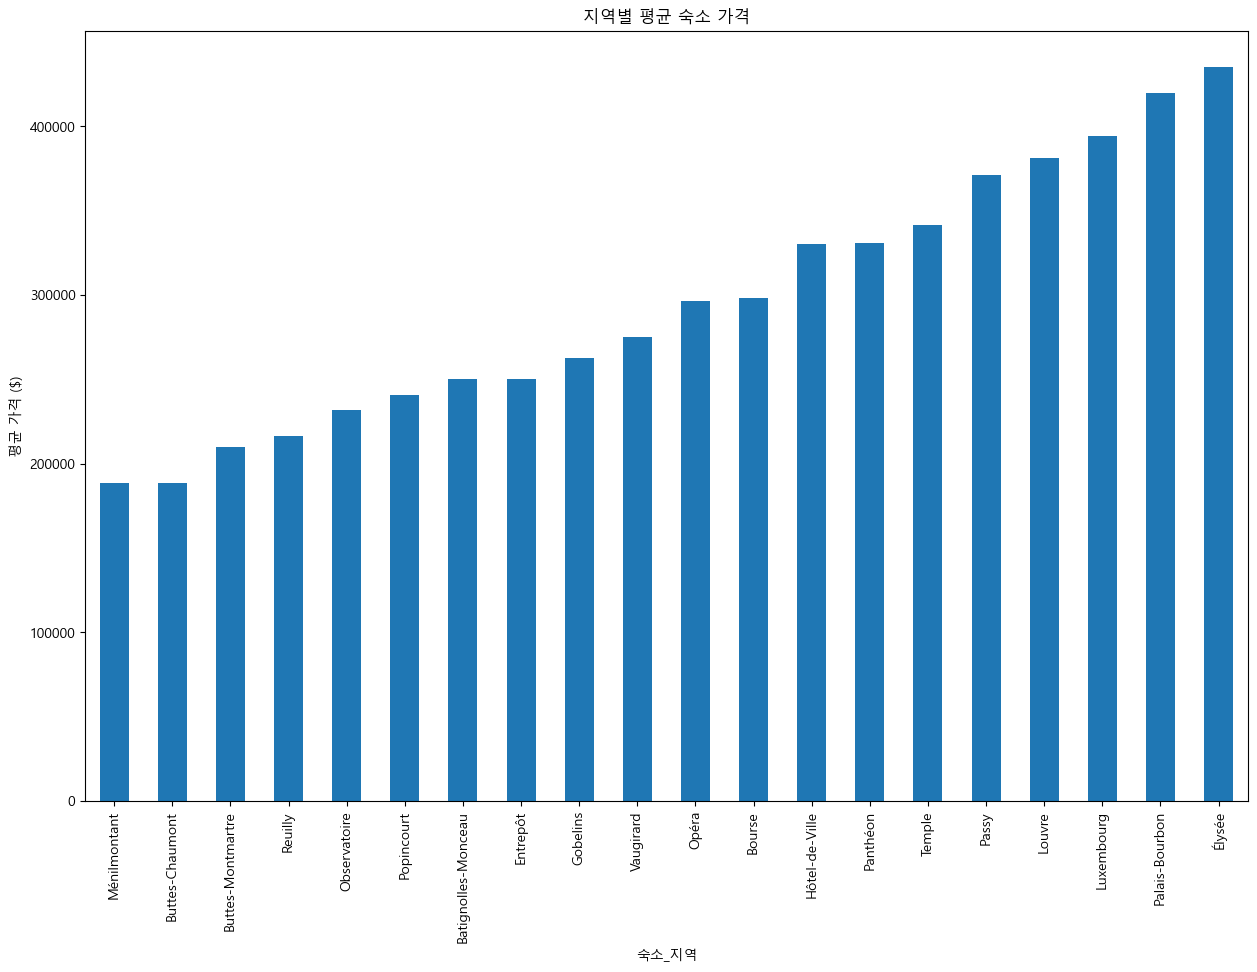

In [11]:
#숙소가격 null값 제거
check1= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
check1['숙소_가격'] = check1['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)
check1['숙소_가격'] = check1['숙소_가격']*1352.60

# 지역별 평균 가격 계산
average_prices = check1.groupby('숙소_지역')['숙소_가격'].mean().sort_values()

# 평균 가격 시각화
plt.figure(figsize=(15, 10))
average_prices.plot(kind='bar')
plt.title('지역별 평균 숙소 가격')
plt.ylabel('평균 가격 ($)')
plt.show()

In [12]:
print(f" 숙소 지역 평균 가격 \n{average_prices}")


 숙소 지역 평균 가격 
숙소_지역
Ménilmontant           188208.547830
Buttes-Chaumont        188330.421077
Buttes-Montmartre      209893.161165
Reuilly                216603.034569
Observatoire           231526.735405
Popincourt             240852.874891
Batignolles-Monceau    249995.268560
Entrepôt               250130.924807
Gobelins               262856.637082
Vaugirard              274857.940072
Opéra                  296442.227168
Bourse                 297915.629282
Hôtel-de-Ville         330162.313610
Panthéon               330766.213562
Temple                 341623.863611
Passy                  371155.393628
Louvre                 381084.063177
Luxembourg             394461.259087
Palais-Bourbon         419968.631851
Élysée                 434896.094233
Name: 숙소_가격, dtype: float64


In [13]:
average_prices = check1.groupby('숙소_유형')['숙소_가격'].mean().sort_values()
print(f" 숙소 유형 평균 가격 \n{average_prices}")


 숙소 유형 평균 가격 
숙소_유형
Shared room        102256.560000
Private room       196741.450027
Entire home/apt    287824.405279
Hotel room         371253.745169
Name: 숙소_가격, dtype: float64


# Anova분석 (숙소_가격, 숙소_지역)
- 결과 : 관계있음

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA 모델 적합
model = ols('숙소_가격 ~ 숙소_지역', data=check1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# ANOVA 결과 출력
print(anova_table)


                sum_sq       df         F         PR(>F)
숙소_지역     2.019611e+14     19.0  28.38907  1.499881e-101
Residual  1.562507e+16  41731.0       NaN            NaN


# Anova분석 (숙소_가격,숙소_유형)
- 결과 : 관계있음

In [15]:
# ANOVA 모델 적합
model = ols('숙소_가격 ~ 숙소_유형', data=check1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# ANOVA 결과 출력
print(anova_table)

                sum_sq       df          F        PR(>F)
숙소_유형     3.778241e+13      3.0  33.299087  1.733753e-21
Residual  1.578924e+16  41747.0        NaN           NaN


# 지역 + 유형 별 가격 평균
- 생각보다 차이 많이 남

In [16]:
check1.groupby(['숙소_지역','숙소_유형'])['숙소_가격'].mean().sort_values()

숙소_지역            숙소_유형          
Temple           Shared room        5.846921e+04
Buttes-Chaumont  Shared room        6.392505e+04
Popincourt       Shared room        6.468611e+04
Observatoire     Shared room        6.672827e+04
Reuilly          Shared room        7.980340e+04
                                        ...     
Élysée           Entire home/apt    4.491923e+05
Palais-Bourbon   Hotel room         4.702129e+05
Vaugirard        Hotel room         4.789666e+05
Temple           Hotel room         5.006874e+05
Bourse           Hotel room         1.063482e+06
Name: 숙소_가격, Length: 79, dtype: float64

In [17]:
check1[check1['숙소_유형'] == 'Hotel room']

,숙소_id,호스트_id,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용인원수,욕실수,침실수,침대수,...,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,url
961,914070,3980291,t,3.0,Passy,Hotel room,2,1.0,1.0,1.0,...,1,4.91,4.90,4.75,4.95,4.98,4.96,4.85,1.94,https://www.airbnb.com/rooms/914070
3777,4132978,7608379,f,2.0,Palais-Bourbon,Hotel room,6,2.5,3.0,5.0,...,0,4.70,4.73,4.64,4.69,4.70,4.94,4.54,0.84,https://www.airbnb.com/rooms/4132978
9072,9763149,50342512,f,6.0,Batignolles-Monceau,Hotel room,5,2.0,2.0,3.0,...,0,4.67,4.67,5.00,4.50,4.83,4.17,4.33,0.06,https://www.airbnb.com/rooms/9763149
9080,9763165,50342512,f,6.0,Buttes-Montmartre,Hotel room,2,1.0,1.0,1.0,...,0,4.35,4.50,4.55,4.79,4.80,4.26,4.05,0.20,https://www.airbnb.com/rooms/9763165
10919,12534183,67902959,f,7.0,Vaugirard,Hotel room,4,1.0,1.0,2.0,...,0,4.70,4.72,4.87,4.83,4.83,4.63,4.76,1.10,https://www.airbnb.com/rooms/12534183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29198,39189665,299271608,f,7.0,Batignolles-Monceau,Hotel room,2,1.0,1.0,1.0,...,4,4.51,4.50,4.62,4.63,4.69,4.71,4.45,5.05,https://www.airbnb.com/rooms/39189665
29199,39189852,299271608,f,7.0,Batignolles-Monceau,Hotel room,2,1.0,1.0,1.0,...,0,4.00,4.42,4.58,4.42,4.25,4.33,3.83,0.22,https://www.airbnb.com/rooms/39189852
29204,39190011,299271608,f,7.0,Batignolles-Monceau,Hotel room,3,1.0,1.0,2.0,...,0,4.50,4.56,4.64,4.81,4.75,4.74,4.48,1.80,https://www.airbnb.com/rooms/39190011
42204,636051848763827734,458723902,f,12.0,Hôtel-de-Ville,Hotel room,3,1.5,1.0,2.0,...,0,4.23,4.38,4.08,4.41,4.21,4.87,4.00,1.87,https://www.airbnb.com/rooms/636051848763827734


In [18]:
# 상위 10개 데이터 확인용
top_10_details = check1.loc[check1['숙소_가격'].sort_values(ascending=False).head(10).index, ['숙소_id', '숙소_가격', 'url']]


# 가격 확인 결과 
 
23285448 없음

873142104727787209 : 없음

644744645250321094 : 다름

36624656 : 다름


+ 월별, 일별 나오는거 해결?


In [19]:
top_10_details

,숙소_id,숙소_가격,url
27548,36624656,72011071.4,https://www.airbnb.com/rooms/36624656
24552,32740447,25491099.6,https://www.airbnb.com/rooms/32740447
53850,873142104727787209,21504987.4,https://www.airbnb.com/rooms/873142104727787209
43061,650613932629146572,20289000.0,https://www.airbnb.com/rooms/650613932629146572
39408,557849127896979136,15690160.0,https://www.airbnb.com/rooms/557849127896979136
19014,23285448,14741987.4,https://www.airbnb.com/rooms/23285448
28126,37250543,13526000.0,https://www.airbnb.com/rooms/37250543
42631,644744645250321094,13526000.0,https://www.airbnb.com/rooms/644744645250321094
14576,17250002,13526000.0,https://www.airbnb.com/rooms/17250002
25955,34663834,13526000.0,https://www.airbnb.com/rooms/34663834


In [20]:
check1[check1['숙소_가격']==10000.0]

,숙소_id,호스트_id,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용인원수,욕실수,침실수,침대수,...,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,url


In [21]:
check1['숙소_유형'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [22]:
check1[check1['숙소_유형']=='Shared room'][['침대수','침실수','욕실수']]

,침대수,침실수,욕실수
463,2.0,1.0,1.0
1113,4.0,1.0,1.0
1265,2.0,1.0,1.0
1336,1.0,1.0,1.0
1664,1.0,1.0,1.0
...,...,...,...
70725,1.0,1.0,1.0
70922,0.0,1.0,1.0
72755,1.0,1.0,0.5
79642,6.0,1.0,1.0


In [23]:
print(f"전체 개수 : {len(check1)}")
print(f"shared room 개수 : {len(check1[check1['숙소_유형']=='Shared room'])}")
print(f"침대수 : {check1[check1['숙소_유형']=='Shared room']['침대수'].isnull().sum()}")
print(f"침실수 : {check1[check1['숙소_유형']=='Shared room']['침실수'].isnull().sum()}")
print(f"욕실수 : {check1[check1['숙소_유형']=='Shared room']['침실수'].isnull().sum()}")


전체 개수 : 41751
shared room 개수 : 200
침대수 : 0
침실수 : 0
욕실수 : 0


In [24]:
print(f"전체 개수 : {len(check1)}")
print(f"Entire home/apt  개수 : {len(check1[check1['숙소_유형']=='Entire home/apt'])}")
print(f"침대수 : {check1[check1['숙소_유형']=='Entire home/apt']['침대수'].isnull().sum()}")
print(f"침실수 : {check1[check1['숙소_유형']=='Entire home/apt']['침실수'].isnull().sum()}")
print(f"욕실수 : {check1[check1['숙소_유형']=='Entire home/apt']['침실수'].isnull().sum()}")


전체 개수 : 41751
Entire home/apt  개수 : 37432
침대수 : 18
침실수 : 44
욕실수 : 44


In [25]:
print(f"전체 개수 : {len(check1)}")
print(f"Private room  개수 : {len(check1[check1['숙소_유형']=='Private room'])}")
print(f"침대수 : {check1[check1['숙소_유형']=='Private room']['침대수'].isnull().sum()}")
print(f"침실수 : {check1[check1['숙소_유형']=='Private room']['침실수'].isnull().sum()}")
print(f"욕실수 : {check1[check1['숙소_유형']=='Private room']['침실수'].isnull().sum()}")


전체 개수 : 41751
Private room  개수 : 3674
침대수 : 11
침실수 : 1
욕실수 : 1


In [26]:
print(f"전체 개수 : {len(check1)}")
print(f"Hotel room room  개수 : {len(check1[check1['숙소_유형']=='Hotel room'])}")
print(f"침대수 : {check1[check1['숙소_유형']=='Hotel room']['침대수'].isnull().sum()}")
print(f"침실수 : {check1[check1['숙소_유형']=='Hotel room']['침실수'].isnull().sum()}")
print(f"욕실수 : {check1[check1['숙소_유형']=='Hotel room']['침실수'].isnull().sum()}")


전체 개수 : 41751
Hotel room room  개수 : 445
침대수 : 54
침실수 : 0
욕실수 : 0


In [27]:
check1.isnull().sum()

숙소_id           0
호스트_id          0
슈퍼호스트           0
숙소_수            0
숙소_지역           0
숙소_유형           0
수용인원수           0
욕실수            10
침실수            45
침대수            83
편의시설            0
숙소_가격           0
최소_숙박일          0
최대_숙박일          0
리뷰수             0
30일_리뷰수         0
리뷰점수            0
숙소_정확성_리뷰점수    25
숙소_청결도_리뷰점수    23
숙소_체크인_리뷰점수    27
숙소_소통_리뷰점수     24
숙소_위치_리뷰점수     26
숙소_가격_리뷰점수     30
평균_리뷰수          0
url             0
dtype: int64

- 숙소_가격 9999 두개 다 없음

- 7000 은 실제 값 맞음 (한화 월에 3억?)

- 이상함 => 전체 데이터 확인

In [35]:
check1[check1['최소_숙박일'] >= 360][['숙소_id', 'url', '숙소_가격','최소_숙박일']].sort_values(by='숙소_가격', ascending=True).head(20)

,숙소_id,url,숙소_가격,최소_숙박일
26553,35516893,https://www.airbnb.com/rooms/35516893,25699.4,365
11541,13148585,https://www.airbnb.com/rooms/13148585,32462.4,365
22456,28551624,https://www.airbnb.com/rooms/28551624,39225.4,365
9110,9772416,https://www.airbnb.com/rooms/9772416,40578.0,365
15721,18894075,https://www.airbnb.com/rooms/18894075,40578.0,365
36022,50626121,https://www.airbnb.com/rooms/50626121,47341.0,365
36305,50929017,https://www.airbnb.com/rooms/50929017,52751.4,365
2127,2144777,https://www.airbnb.com/rooms/2144777,54104.0,365
29914,40090471,https://www.airbnb.com/rooms/40090471,54104.0,365
34834,48696077,https://www.airbnb.com/rooms/48696077,54104.0,365


# 실제 값 확인 
- 36624656  : 53239.0 >  140 달러   => 연단위인듯? 1년 단위는 확인 못함
- 49621582	: 9999.0 > 227달러      => 한달?
- 650613932629146572 : 15000.0 > 390 달러  => 한달?
- 644744645250321094 : 10000.0 > 380 달러  => 한달?

- 32740447  : 예약 못함

- 873142104727787209 : 없음
- 23285448 : 없음
- 922908836897208560 : 없음
- 942601205380131462 : 없음
- -----------------------------------------------------------------
- 17250002 : 맞음
- 34663834 : 맞음
- 38403989 : 맞음
- 44218823 : 맞음
- 37250543 : 맞음
- 808535416806333679 : 맞음
- 557849127896979136 : 맞음
- 705497985789497932 : 맞음
- 835963399185156883 : 맞음
- 752040291810643820 : 맞음
- 1014335639818006967 : 맞음


In [29]:
check1[['숙소_id','숙소_유형', 'url', '숙소_가격','최소_숙박일']].sort_values(by='숙소_가격', ascending=False).head(20)

,숙소_id,숙소_유형,url,숙소_가격,최소_숙박일
27548,36624656,Entire home/apt,https://www.airbnb.com/rooms/36624656,72011071.4,1
24552,32740447,Entire home/apt,https://www.airbnb.com/rooms/32740447,25491099.6,5
53850,873142104727787209,Entire home/apt,https://www.airbnb.com/rooms/873142104727787209,21504987.4,1
43061,650613932629146572,Entire home/apt,https://www.airbnb.com/rooms/650613932629146572,20289000.0,4
39408,557849127896979136,Entire home/apt,https://www.airbnb.com/rooms/557849127896979136,15690160.0,178
19014,23285448,Private room,https://www.airbnb.com/rooms/23285448,14741987.4,1
28126,37250543,Entire home/apt,https://www.airbnb.com/rooms/37250543,13526000.0,2
42631,644744645250321094,Entire home/apt,https://www.airbnb.com/rooms/644744645250321094,13526000.0,3
14576,17250002,Entire home/apt,https://www.airbnb.com/rooms/17250002,13526000.0,2
25955,34663834,Entire home/apt,https://www.airbnb.com/rooms/34663834,13526000.0,3


# 연단위 확인

In [36]:
check1[check1['최소_숙박일'] >= 366][['숙소_id', 'url', '숙소_가격','최소_숙박일']].sort_values(by='숙소_가격', ascending=False)

,숙소_id,url,숙소_가격,최소_숙박일
22264,28100121,https://www.airbnb.com/rooms/28100121,451768.4,500
14819,17691509,https://www.airbnb.com/rooms/17691509,188011.4,1000
13080,14573284,https://www.airbnb.com/rooms/14573284,162312.0,370
2405,2707348,https://www.airbnb.com/rooms/2707348,135260.0,400
329,535068,https://www.airbnb.com/rooms/535068,114971.0,500
2158,2227962,https://www.airbnb.com/rooms/2227962,94682.0,400
34988,49443150,https://www.airbnb.com/rooms/49443150,66277.4,1123


# 1차 정리
- 숙소_지역, 숙소_유형은 숙소_가격과 관계가 있다
- 같은 지역, 같은 유형이여도 가격 차이가 많이 난다
- 숙소 가격 있는건 결측치 제거 가능
- 숙소 가격 null 결측치 너무 많음 => 어떻게 처리할지 이야기 해야함

+--------------------------------------------------------------------------------------+
- 전체 데이터에서 확인 결과 
  - 지금은 존재하지 않는 데이터 확인 
    - 어떻게 할지 이야기 하나하나 확인? 어려움
    - 그냥 쓰자니 연단위, 월단위 확인 불가
  - 30일 넘어가면 에어비엔비에서 월단위로 바뀜
  - ex) https://www.airbnb.com/rooms/38403989
  - 연단위 확인 결과	

+ 여기서 문제가 최소_숙박일로 확인 불가
  - 최소_숙박일이 하루여도 30일 넘게 등록하면 월단위로 넘어감
  - 단 30일 넘어가는 것들은 월단위 가능할듯 => 확인 결과 x
  - ex) https://www.airbnb.com/rooms/43995613
  - d
  
